In [66]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn


from sklearn.preprocessing import StandardScaler # Стандартизация от мира scikit-learn

import plotly.express as px # yet another 3-D рисовалка
from mpl_toolkits.mplot3d import Axes3D

In [52]:
plt.style.use('seaborn-v0_8-dark')

### **Набор данных MNIST**

В качестве данных мы рассмотрим набор данных MNIST

Классический набор изображений Fashion-MNIST (про одежду)

Размер изображений 28 на 28, что можно рассматривать как большую таблицу признаков из 784 столбцов


In [67]:
X, y  = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame = True)
X = X / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Таблица данных

In [68]:
X

pixel1  pixel2  pixel3  pixel4  pixel5    pixel6  pixel7  pixel8  \
0         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0  0.003922     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
...       ...     ...     ...     ...     ...       ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   

         pixel9   pixel10  ...  pixel775  pixel776  pixel777  pixel778  \
0      0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  ...  0.466667  0.447059  0.509804  0.298039   
2      0.000000  0.086275  ...  0.000000  0.000000  0.003922  0.000000   
3      0.129412  0.376471  ...  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
...         ...       ...  ...       ...       ...       ...       ...   
69995  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
69996  0.000000  0.121569  ...  0.000000  0.000000  0.000000  0.000000   
69997  0.000000  0.000000  ...  0.105882  0.000000  0.000000  0.000000   
69998  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
69999  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

       pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [69]:
X.describe()

pixel1        pixel2        pixel3        pixel4        pixel5  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.000003      0.000025      0.000135      0.000388      0.000972   
std        0.000343      0.001163      0.004709      0.009643      0.017287   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.062745      0.176471      0.854902      0.725490      0.890196   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.001603      0.003149      0.008645      0.022098      0.056510   
std        0.022911      0.032104      0.055362      0.092937      0.149758   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.901961      0.878431      0.882353      0.996078      1.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  70000.000000  70000.000000  70000.000000  70000.000000   
mean   ...      0.135617      0.091328      0.065144      0.069896   
std    ...      0.225822      0.191903      0.165000      0.172163   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.223529      0.031373      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.089757      0.070463      0.033428      0.010790      0.003281   
std        0.203346      0.177379      0.115796      0.068179      0.036308   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           pixel784  
count  70000.000000  
mean       0.000286  
std        0.008353  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        0.666667  

[8 rows x 784 columns]

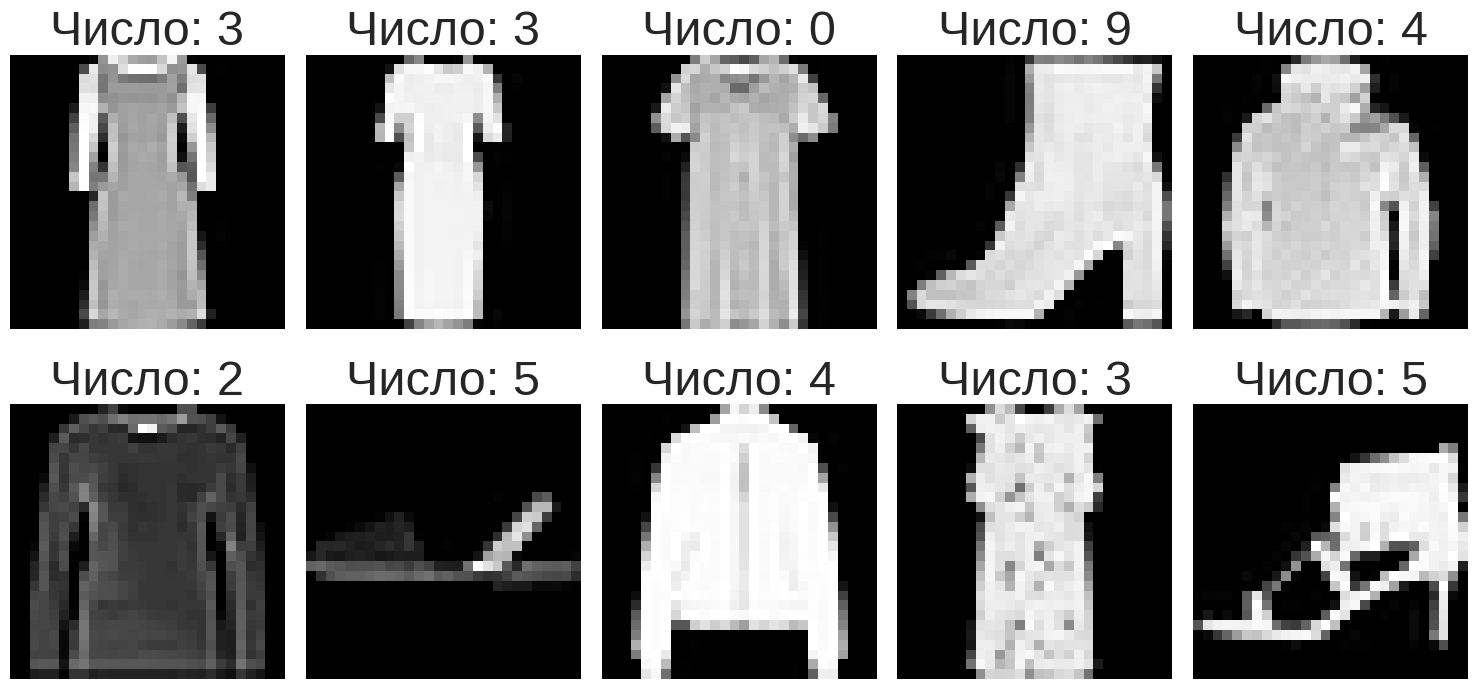

In [70]:
#@title Разные примеры { run: "auto" }
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()

Посмотрим на наши данные как на табличные данные

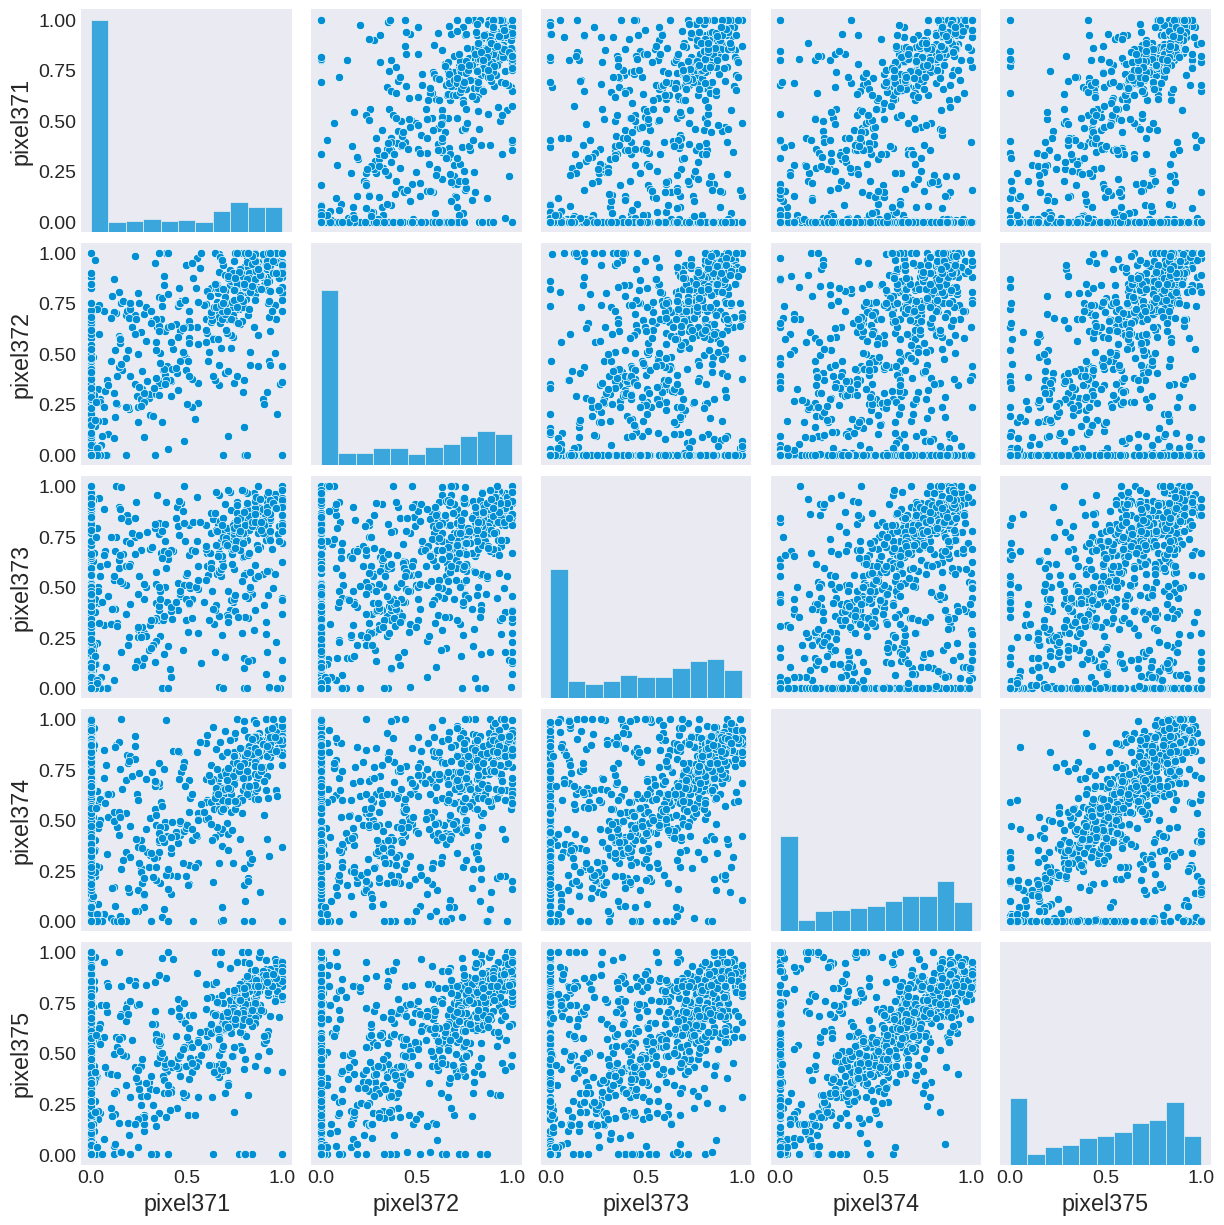

In [71]:
X_plot = X.loc[0:1000,'pixel371':'pixel375'].copy() # данные из середины
sns.pairplot(X_plot);

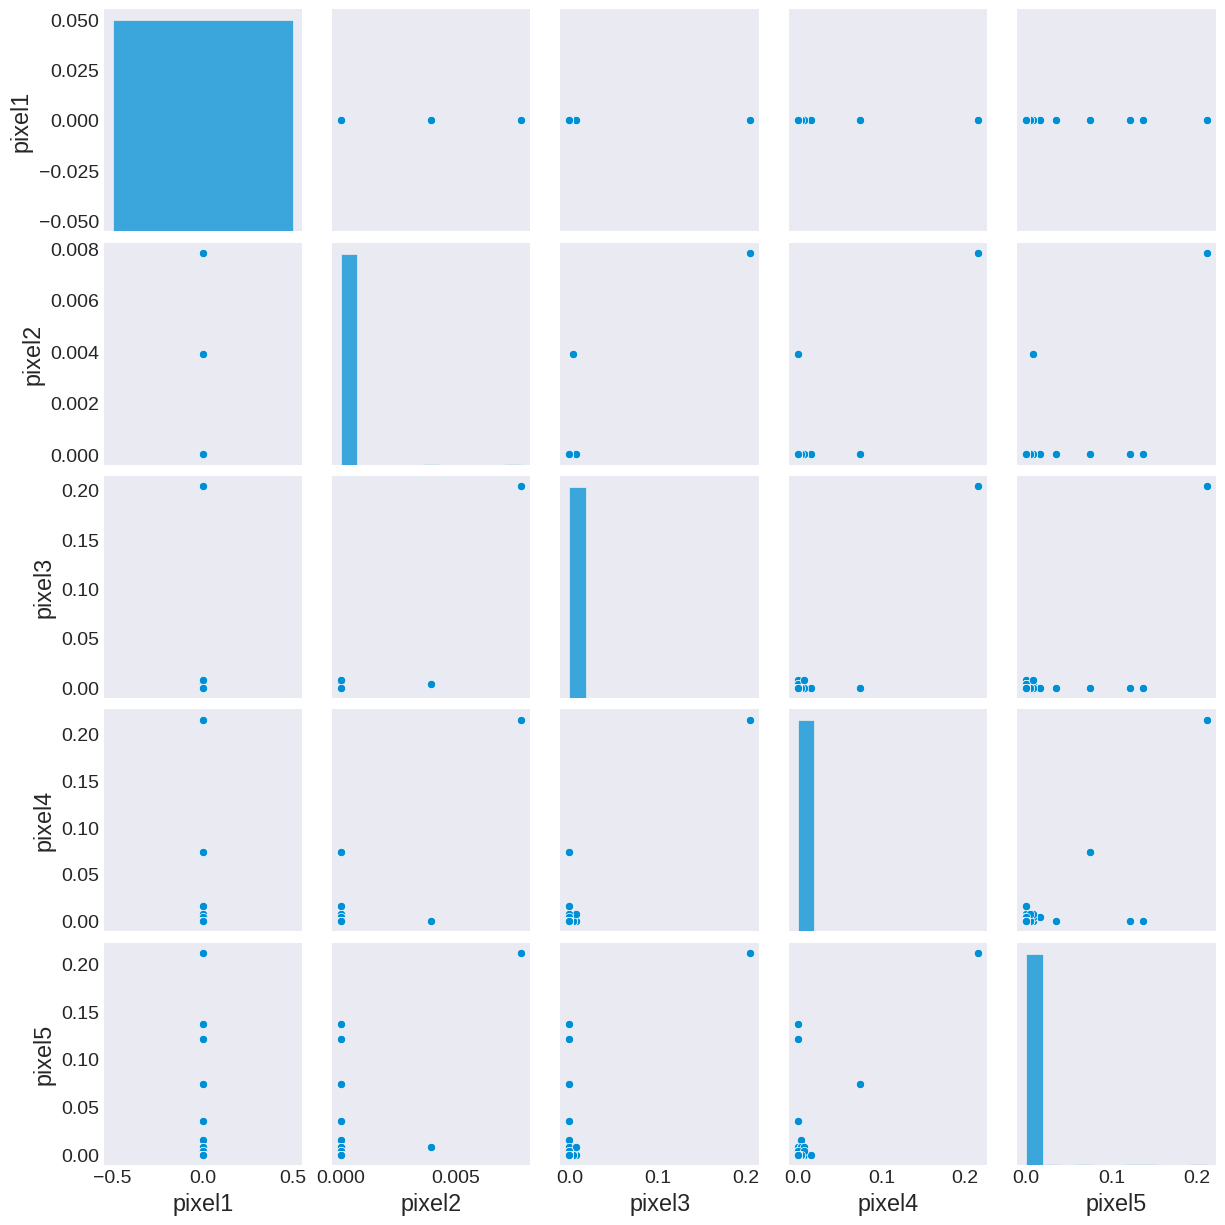

In [72]:
X_plot = X.loc[0:1000,'pixel1':'pixel5'].copy() # данные из первой строки
sns.pairplot(X_plot);

## Применяем Метод Главных Компонент к Данным MNIST

In [73]:
pca = PCA(n_components = 784)
pca.fit(X)

PCA(n_components=784)

Оцениваем пространство главных компонент

In [74]:
pca_result_mnist = pca.transform(X)

## Визуализация

In [75]:
EV=pca.explained_variance_ratio_

## **Построение графиков объясненной дисперсии**

(0.0, 1.1)

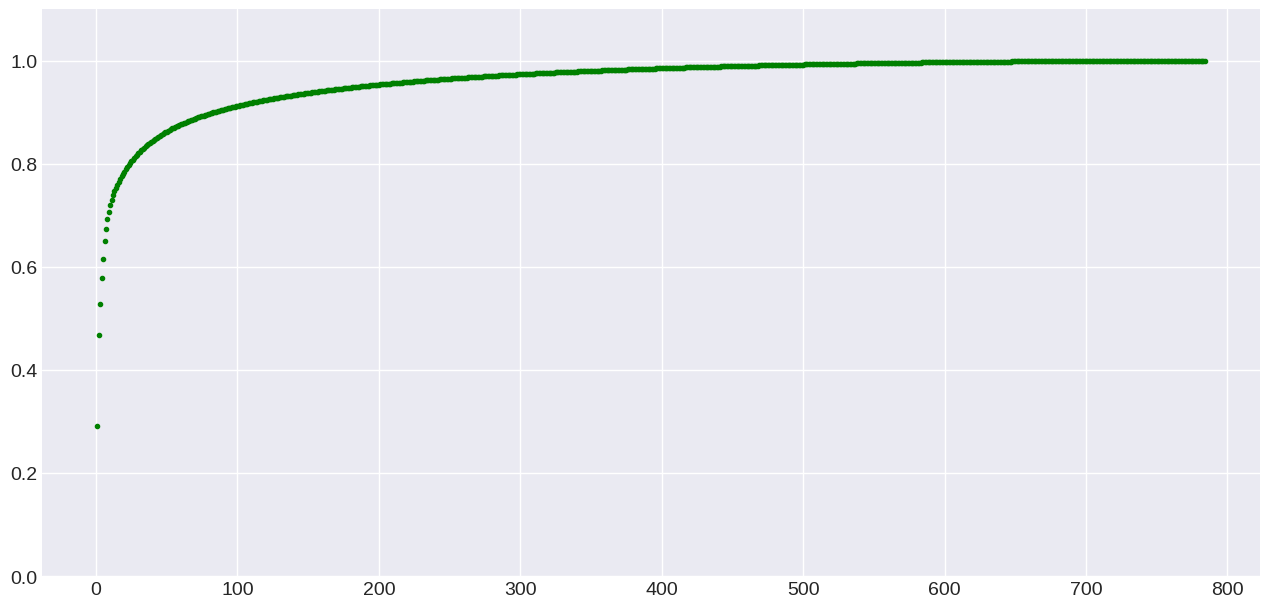

In [77]:
fig = plt.figure( figsize=(14,7) )
plt.plot(np.array(range(len(EV)))+1,np.cumsum(EV),'o',linewidth=1, markersize=3, c = 'g')
plt.grid()
plt.ylim(0,1.1)

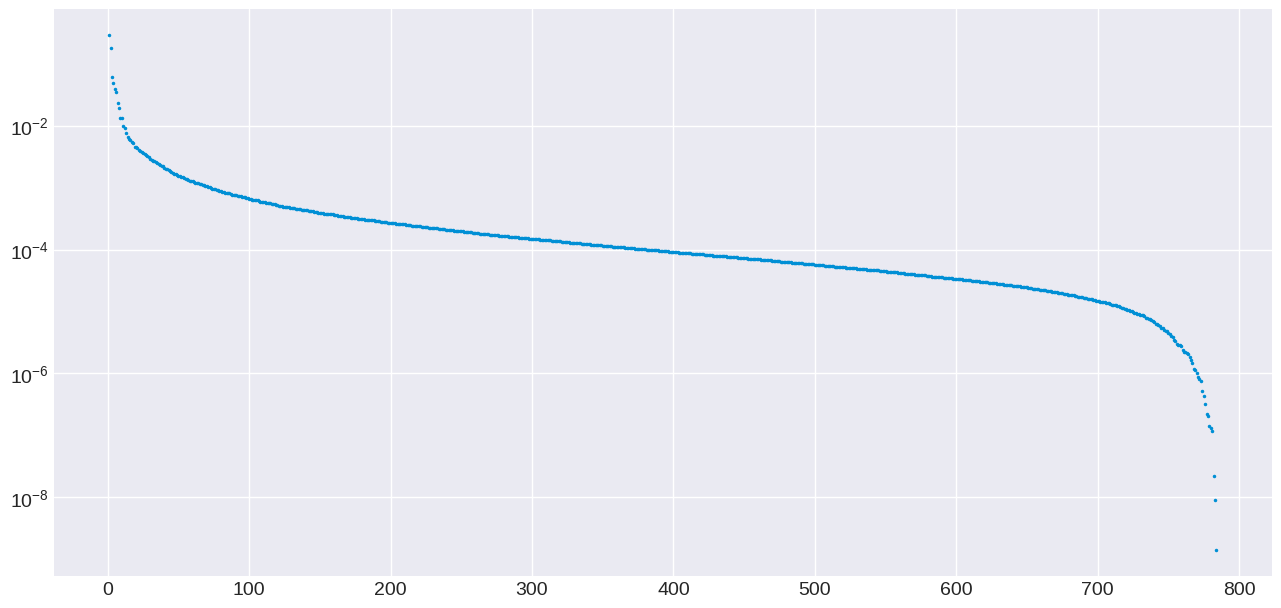

In [78]:
fig = plt.figure( figsize=(14,7) )
plt.semilogy(np.array(range(len(EV)))+1,EV,'.',linewidth=1, markersize=3)
plt.grid()

In [79]:
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)
    Входные переменные:
    ===========
    data: данные
    y: целевые метки
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2
    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-9,10])
        ax.set_ylim([-7,7])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Цифры",
                        fontsize = 10) # собираем легенду
        ax.add_artist(legend1)

In [80]:
pca_names = [str(x+1)+'-я главная компонента' for x in range(4)]

**Пространство Главных Компонент**

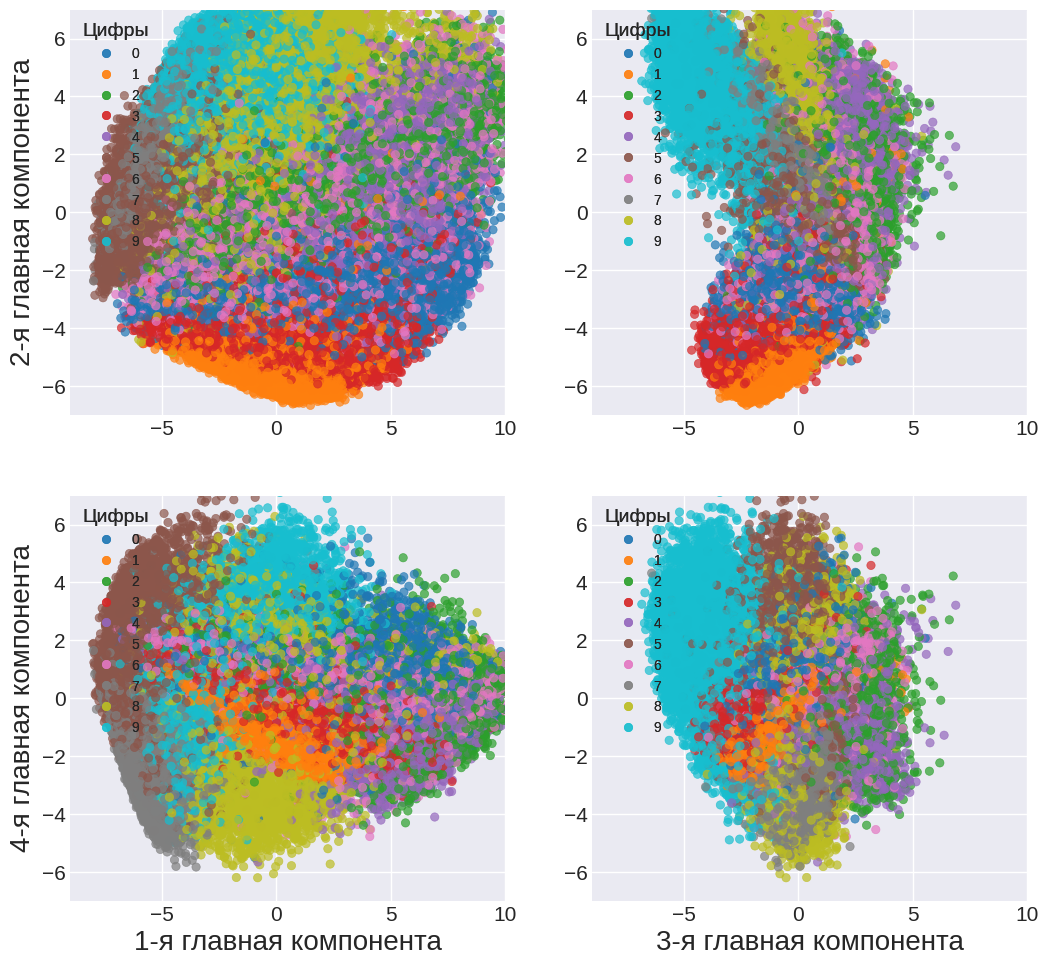

In [81]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

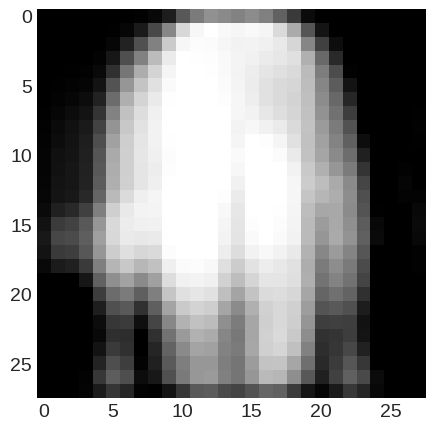

In [82]:
#@title Создаем изображение цифр используя только 4 числа{ run: "auto" }
#@markdown ### 1 главная компонента
pca1 =  6 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 2 главная компонента
pca2 =  -1.7 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 3 главная компонента
pca3 =  1.6 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 4 главная компонента
pca4 =  -4.9 #@param {type:"slider", min:-10, max:10, step:0.1}

test_input = np.array([pca1,pca2,pca3,pca4])


pca_inverse = np.dot(test_input, pca.components_[:4]) + pca.mean_

plt.imshow(1-pca_inverse.reshape((28,28)).astype(float),
           cmap='Greys',
           vmin = 0, vmax = 1);

использование 4 главных компонент дает плохой результат

### Восстановление данных

Сравним восстановленные изображения с исходными

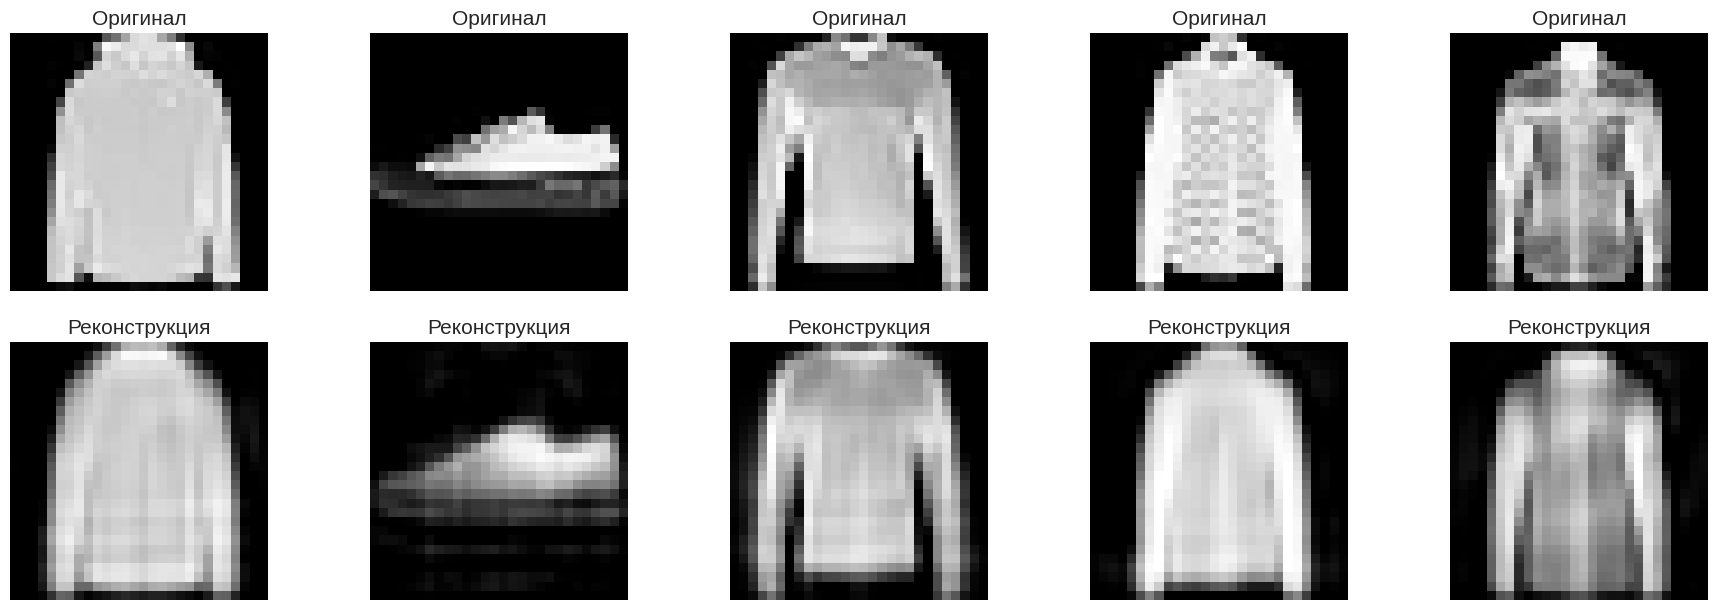

In [83]:
#@title  { run: "auto" }
#@markdown ### Разные примеры
n =  36523 #@param {type:"slider", min:1, max:69984, step:1}
#@markdown ### Количество компонент для восстановления
n_comp =  36 #@param {type:"slider", min:0, max:100, step:1}

pca_inverse = np.dot(pca_result_mnist[:,:n_comp], pca.components_[:n_comp]) + pca.mean_


fig=plt.figure(figsize=(20,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Реконструкция", size=15)
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Оригинал", size=15)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Визуализируем собственные вектора

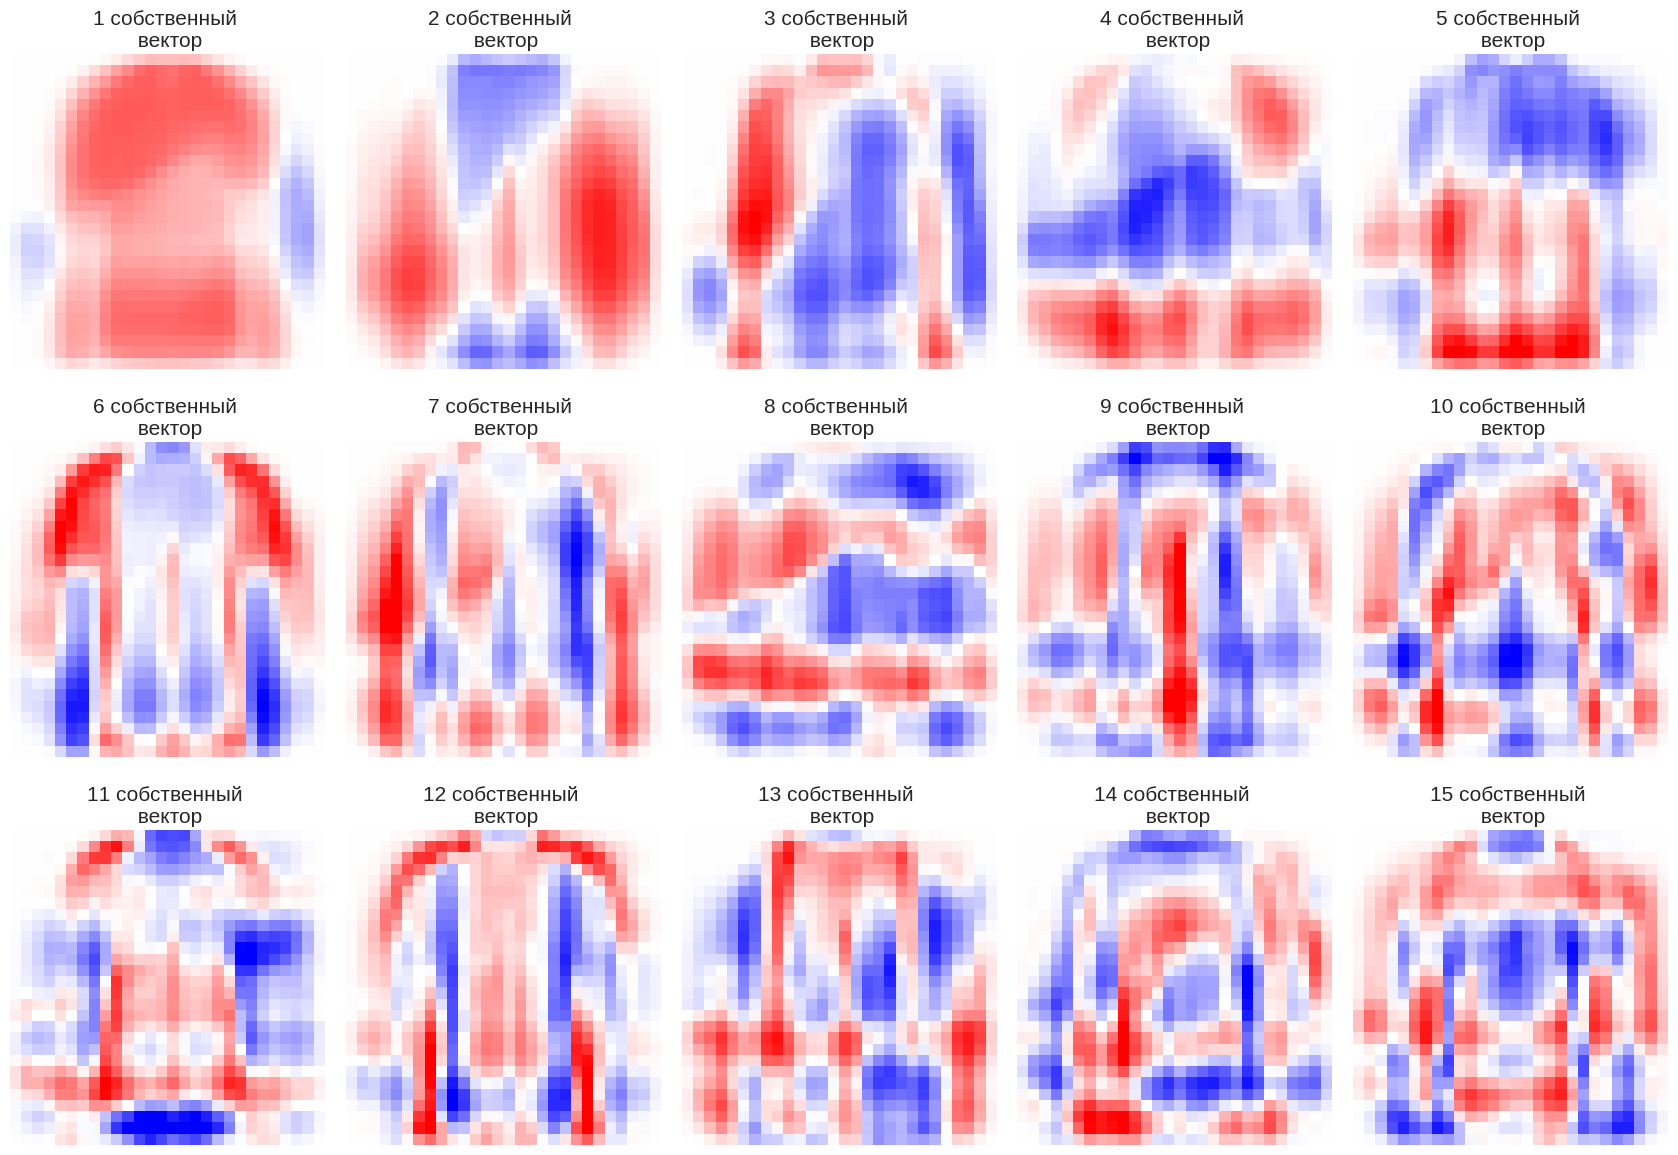

In [84]:
W_pca=pca.components_
fig=plt.figure(figsize=(17,12))
for i in range(0,15):
  ax = fig.add_subplot(3,5,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=15)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.1,vmax = 0.1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

In [85]:
sum(np.abs(pca.components_[0,:])>0.001)

688

Посмотрим на веса исходных признаков

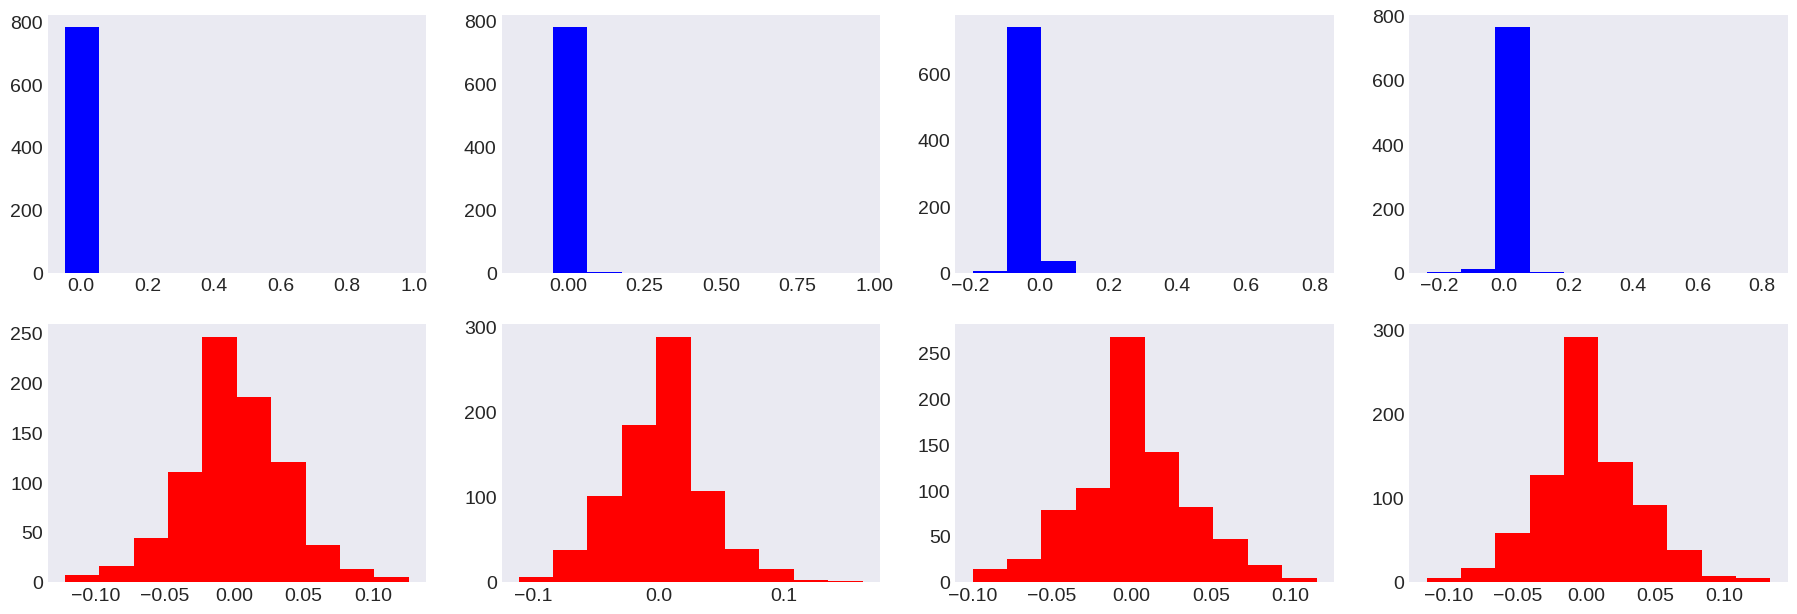

In [86]:
fig = plt.figure(figsize = (20,7))
plt.subplot(241)
plt.hist(pca.components_[:,0],color='b')
plt.subplot(242)
plt.hist(pca.components_[:,1],color='b')
plt.subplot(243)
plt.hist(pca.components_[:,2],color='b')
plt.subplot(244)
plt.hist(pca.components_[:,3],color='b')
plt.subplot(245)
plt.hist(pca.components_[:,370],color='r')
plt.subplot(246)
plt.hist(pca.components_[:,371],color='r')
plt.subplot(247)
plt.hist(pca.components_[:,372],color='r')
plt.subplot(248)
plt.hist(pca.components_[:,373],color='r');

Бесполезные признаки имеют вес строго 0

Для относительно бесполезных признаков есть разрос весов - есть как положительные, так и отрицательные

А значит что-то оказывается полезным с т.з. главных компонент

Таким образом метод главных компонент сам понял какие пиксели важные, а какие нет

### 3Д Графоний

In [87]:
pca_names = ['pca-'+ str(x+1)for x in range(784)]
df = pd.DataFrame(pca_result_mnist, columns = pca_names)
df['label'] = y
df

pca-1     pca-2     pca-3     pca-4     pca-5     pca-6     pca-7  \
0     -0.496090  6.401695 -4.742045  0.974184 -0.002361 -1.587041 -0.365215   
1      5.519862 -1.771300 -1.018705  1.445171  0.840969  4.974617 -0.568565   
2     -2.844825 -4.327834  0.419629  0.815967 -0.416666 -0.214440 -0.009296   
3      0.123754 -3.850481  0.800824  1.472595  0.062746  0.720709 -0.440658   
4      3.154778 -4.713658 -2.929853 -1.040866  1.589313 -0.592367  0.906028   
...         ...       ...       ...       ...       ...       ...       ...   
69995 -2.287762  5.219359 -4.086188  1.313284 -1.802264 -0.208600 -1.918401   
69996 -3.634602 -4.956924  0.583776  0.390309 -1.416761 -0.964446  0.724599   
69997 -2.002390 -2.850766 -0.813989  3.520754  4.277825 -0.131955 -0.567519   
69998 -0.866629 -5.539147 -1.736357 -1.209606 -1.762319 -2.031566  1.202314   
69999 -5.965257  0.362906  1.041944 -0.050400  0.202572 -0.170888 -0.701356   

          pca-8     pca-9    pca-10  ...   pca-776   pca-777   pca-778  \
0      0.788385 -0.129221 -0.108785  ...  0.001630 -0.000582  0.000180   
1     -0.894712 -0.497046 -0.883148  ...  0.000004  0.000163 -0.000197   
2      0.198597 -0.380468 -0.312135  ...  0.000012 -0.000018  0.000230   
3      0.045991 -1.339181  0.363426  ... -0.000146  0.000397  0.000034   
4      0.557034  0.029871 -0.627157  ...  0.000327 -0.000392  0.000165   
...         ...       ...       ...  ...       ...       ...       ...   
69995  1.428328 -0.074657 -0.690056  ...  0.000604  0.000648 -0.000114   
69996  0.628682 -0.260808 -0.274214  ... -0.000430 -0.000403  0.000186   
69997  1.595331 -0.348947 -1.289143  ...  0.000114  0.000188 -0.000205   
69998 -0.088058  1.409900 -0.467091  ...  0.000345  0.000301 -0.000071   
69999  0.013086  0.026739  0.058430  ...  0.000062 -0.000144  0.000410   

        pca-779   pca-780   pca-781   pca-782       pca-783   pca-784  label  
0      0.000477  0.000446  0.000173  0.000071  1.615503e-04  0.000025      9  
1      0.000044  0.000387  0.000287 -0.000002  9.546026e-05 -0.000046      0  
2      0.000035  0.000021  0.000083  0.000009  2.934115e-07 -0.000007      0  
3      0.000359 -0.000661 -0.000745 -0.000135 -5.661555e-05 -0.000065      3  
4     -0.000480 -0.000296 -0.000013 -0.000071  1.683883e-05 -0.000007      0  
...         ...       ...       ...       ...           ...       ...    ...  
69995 -0.000312  0.000187  0.000192 -0.000109 -2.335392e-05  0.000019      9  
69996 -0.000287 -0.000142  0.000397  0.000113  1.291806e-04 -0.000028      1  
69997 -0.000120 -0.000058  0.000170  0.000009  1.633451e-05 -0.000002      8  
69998  0.000213 -0.000095 -0.000072 -0.000045 -8.340874e-05 -0.000003      1  
69999  0.000059  0.000044  0.000331 -0.000092  4.778813e-06 -0.000020      5  

[70000 rows x 785 columns]

In [90]:
fig = px.scatter_3d(df, x=df["pca-1"], y=df["pca-2"], z=df["pca-3"],
              color=df["label"])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))